In [1]:
import tensorly as tl
import numpy as np

# Folding-unfolding

In [2]:
tl.set_backend('numpy')
X = tl.tensor(np.arange(24).reshape((3, 4, 2)))
type(X)

numpy.ndarray

In [3]:
tl.unfold(X, mode=0)

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [4]:
tl.unfold(X, mode=1)

array([[ 0,  1,  8,  9, 16, 17],
       [ 2,  3, 10, 11, 18, 19],
       [ 4,  5, 12, 13, 20, 21],
       [ 6,  7, 14, 15, 22, 23]])

In [5]:
tl.unfold(X, mode=2)

array([[ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22],
       [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]])

# Compression

In [6]:
from tensorly.decomposition import parafac
X = tl.tensor(np.arange(24).reshape((3, 4, 2)))

In [7]:
from tensorly.decomposition import tucker, partial_tucker

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 

from skimage.transform import resize
from skimage.data import astronaut, chelsea
from matplotlib.pyplot import imread
image1 = imread("rgb.jpeg")
image2 = np.array(astronaut(), dtype=np.float64)

# Convert it to a tensor of floats
image1 = np.array(image1, dtype=np.float64)
image2 = np.array(image2, dtype=np.float64)


def to_image(tensor):
    """convert a tensor of float values into an image
    """
    tensor -= tensor.min()
    tensor /= tensor.max()
    tensor *= 255
    return tensor.astype(np.uint8)

def show_im(img, title):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(to_image(img))
    ax.set_axis_off()
    plt.title(title)

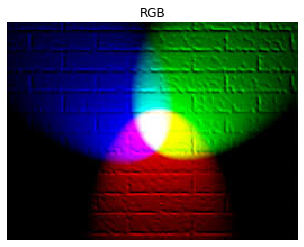

In [9]:
show_im(image1, "RGB")

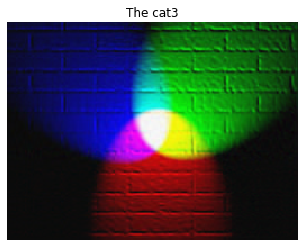

In [44]:
core, factors = tucker(image1, rank=[50, 50, 3])
rec_image = tl.tucker_to_tensor((core, factors))
show_im(rec_image, "RGB3")

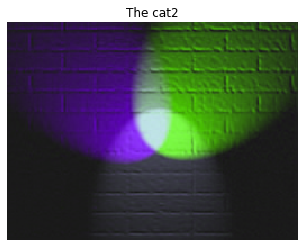

In [45]:
core, factors = tucker(image1, rank=[50, 50, 2])
rec_image2 = tl.tucker_to_tensor((core, factors))
show_im(rec_image2, "RGB2")

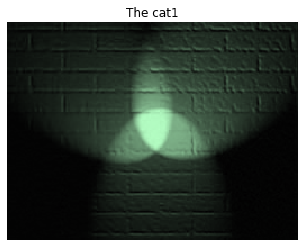

In [46]:
core, factors = tucker(image1, rank=[50, 50, 1])
rec_image1 = tl.tucker_to_tensor((core, factors))
show_im(rec_image1, "RGB1")

# Completion

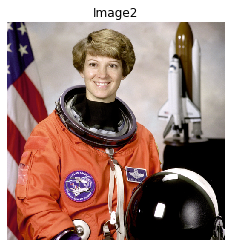

In [9]:
show_im(image2, "Image2")

In [10]:
from skimage.transform import AffineTransform, warp

def shift(image, vector):
    transform = AffineTransform(translation=vector)
    shifted = warp(image, transform, mode='wrap', preserve_range=True)

    shifted = shifted.astype(image.dtype)
    return shifted

In [11]:
image2.shape

(512, 512, 3)

In [12]:
shifted_im_list = [image2]
for x_shift in [-2, -1, 0, 1, 2]:
    for y_shift in [-2, -1, 0, 1, 2]:
        sh_i = shift(image2, (x_shift, y_shift))
        shifted_im_list.append(sh_i)
        

In [13]:
aa.shape

NameError: name 'aa' is not defined

In [ ]:
show_im(tensor[0], "Image2")

In [14]:
tensor = tl.concatenate([elem[None, ...] for elem in shifted_im_list], axis=0)
tensor.shape

(26, 512, 512, 3)

**delete 60 % of information in tensor**

In [15]:
np.random.binomial(1, 0.2, 10)

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1])

In [16]:
arr = np.random.binomial(1, 0.3, tensor.shape)
null_one_tensor = tl.tensor(arr)
currupted_im = tensor*null_one_tensor

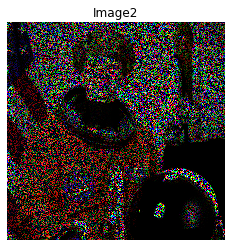

In [17]:
show_im(currupted_im[0], "Image2")

In [21]:
core, factors = partial_tucker(currupted_im, ranks=[60, 60, 3], modes=[1, 2, 3])

In [92]:
core1 = tl.tenalg.multi_mode_dot(image2, factors, transpose=True)
rec1 = tl.tucker_to_tensor((core1, factors))

In [93]:
rec1.shape

(512, 512, 3)

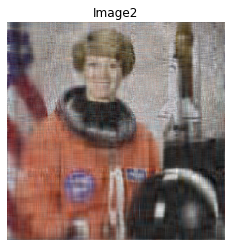

In [94]:
show_im(rec1, "Image2")